In [154]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
from torch_geometric import data
from torch_geometric.loader import DataLoader

In [155]:
%run model.ipynb
%run utils.ipynb
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device='cpu'

In [156]:
# Set training parameters
learning_rate = 1e-3
batch_size = 1
num_epochs = 100
patience = 5

In [157]:
x = torch.tensor([[0.0], [1.0]])
y = torch.tensor([[1, 0], [0, 1]])
edge_index = torch.tensor([[0, 1]]).T
dataset = [data.Data(x, y=y, edge_index=edge_index)]
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=False)
val_loader = DataLoader(dataset, batch_size=batch_size, shuffle=False)
for batch in train_loader:
    print(batch)

DataBatch(x=[2, 1], edge_index=[2, 1], y=[2, 2], batch=[2], ptr=[2])


In [158]:
node_dim = 1
edge_dim = 1
output_dim = 2
hidden_dim = 4
n_gnn_layers = 3
K = 1
dropout_rate = 0.0

# Create model
model = GNN_Example(node_dim, edge_dim, output_dim, hidden_dim, n_gnn_layers, K, dropout_rate).to(device)
print(model)

GNN_Example(
  (dropout): Dropout(p=0.0, inplace=False)
  (relu): PReLU(num_parameters=1)
  (convs): ModuleList(
    (0): TAGConv(1, 4, K=1)
    (1): TAGConv(4, 4, K=1)
    (2): TAGConv(4, 2, K=1)
  )
)


In [159]:
# Create the optimizer to train the neural network via back-propagation
optimizer = torch.optim.Adam(params=model.parameters(), lr=learning_rate)
criterion = nn.MSELoss()

In [160]:
train_losses, validation_losses = train(num_epochs, model, train_loader, val_loader, optimizer, criterion, device, patience)

epoch: 10 	 training loss: 0.4724 	 validation loss: 0.4701
epoch: 20 	 training loss: 0.4499 	 validation loss: 0.4477
epoch: 30 	 training loss: 0.4279 	 validation loss: 0.4257
epoch: 40 	 training loss: 0.4062 	 validation loss: 0.404
epoch: 50 	 training loss: 0.3846 	 validation loss: 0.3824
epoch: 60 	 training loss: 0.3631 	 validation loss: 0.3609
epoch: 70 	 training loss: 0.3417 	 validation loss: 0.3396
epoch: 80 	 training loss: 0.321 	 validation loss: 0.3191
epoch: 90 	 training loss: 0.3024 	 validation loss: 0.3005
epoch: 100 	 training loss: 0.2847 	 validation loss: 0.283
Model training took 0.815 seconds


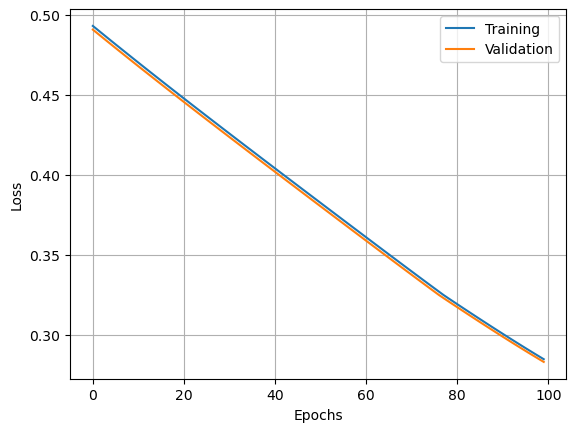

In [161]:
plt.grid()
plt.plot(train_losses, label='Training')
plt.plot(validation_losses, label='Validation')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()